<a href="https://colab.research.google.com/github/BrokenShell/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












no tables - too hard, ok for stretch
do basics for practice


# 1) Replicate the lesson code.

In [18]:
from IPython.display import display, Image
# Import Data
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)
# Target Graph
display(example)

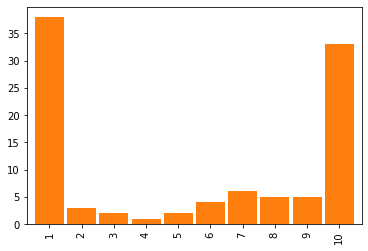

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fake Data
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))
fake.plot.bar(color='C1', width=0.9);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


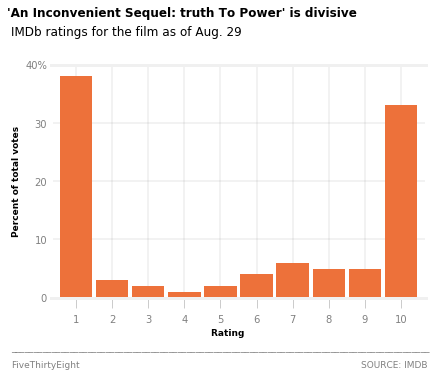

In [20]:
# Set stylesheet
plt.style.use('fivethirtyeight')

# figure axes syntax
fig, ax = plt.subplots()

# Make the figure background color white
fig.patch.set(facecolor='white')

# put bars on the axes
fake.plot.bar(width=0.9, color='#ED713A')

# Set axes background color
ax.set(facecolor='white')

# Set plot title
ax.set_title("'An Inconvenient Sequel: truth To Power' is divisive", fontsize=12, fontweight='bold', x=.35, y=1.18, usetex=False, fontname='Arial')

# Set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Set plot xlabel
ax.set_xlabel('Rating       ', fontsize=9, fontweight='bold')

# Set subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=45, x=-1.8, fontsize=12, usetex=False, fontname='Arial')

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10, color='grey')
ax.set_yticks(range(0,50,10))

# Set x axis labels, tick marks and grid lines
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10, color='grey')

# Set tick mark params
ax.tick_params(axis='x', length=10, color='#CCCCCC', pad=7, width=1)

# spine options
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

# Grind style
ax.grid(color='gray', linewidth=0.2)

# footer
ax.text(s='FiveThirtyEight', y=-12, x=-1.8, fontsize=9, usetex=False, color='gray')
ax.text(s='SOURCE: IMDB', y=-12, x=7.9, fontsize=9, usetex=False, color='gray')
ax.text(s=('_' * 93), y=-9, x=-1.8, fontsize=9, usetex=False, color='gray')

# Show the plot and squelch the funny output
fig.show()

# 2) Reproduce another example from FiveThityEight's shared data repository.

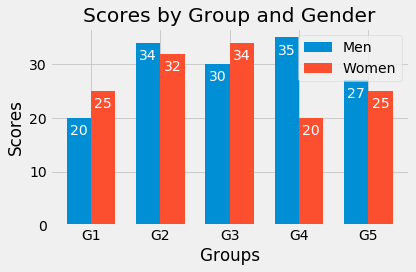

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels
ax.set_xlabel('Groups')
ax.set_ylabel('Scores')
ax.set_title('Scores by Group and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            str(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, -20),
            textcoords="offset points",
            ha='center', 
            va='bottom',
            color='white',
        )


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Altair Exploration

## Flowers: Iris

In [22]:
import altair as alt
alt.renderers.enable('colab')
# Vega has super clean data for playing around
from vega_datasets import data

iris = data.iris()
# petalLength by sepalWidth, like crosstabs but better
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalLength',
    y='sepalWidth',
    color='species',
    tooltip=list(iris.columns)
)

alt.Chart(...)

## Cars

This graph set unifies 3 graphs, making a selection in one will highlight data across all three graphs. This is SO COOL!

In [23]:
cars = data.cars()
selection = alt.selection_interval()
chart = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(
        selection, 
        'Origin:N', 
        alt.value('gray'),
    ),
    tooltip=list(cars.columns)
).add_selection(selection)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin',
).transform_filter(selection).properties(width=860)

((chart | chart.encode(x='Acceleration:Q')) & hist)

alt.VConcatChart(...)

## Clickable Legend

This is a hack to make a clickable legend.

In [24]:
click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(cars).mark_point().encode(
    x=alt.X('Horsepower:Q', title="Horsepower"),
    y=alt.Y('Miles_per_Gallon:Q', title="Miles per Gallon"),
    color=alt.Color('Origin:N', legend=None)
).transform_filter(
    click
)

legend = alt.Chart(cars).mark_circle(size=100).encode(
    y=alt.Y('Origin', title=""),
    color=alt.condition(click, 'Origin', alt.value('lightgray'), legend=None)
).properties(
    selection=click
)

scatter | legend

alt.HConcatChart(...)

# Seattle Temps

In [25]:
temps = data.seattle_temps()
alt.data_transformers.enable('default', max_rows=None)

alt.Chart(temps, title="Seattle Monthly Temp Range").mark_point().encode(
    x=alt.X('date:T', timeUnit='month', title='Month'),
    y=alt.Y('temp:Q', title='Temperature Range'),
)

alt.Chart(...)

In [26]:
alt.Chart(temps, title="Seattle Monthly Average Temp").mark_bar().encode(
    x=alt.X('date:O', timeUnit='month', title='Month'),
    y=alt.Y('mean(temp):Q', title="Mean Temperature"),
)

alt.Chart(...)

In [27]:
alt.Chart(temps, title="Seattle Daily Heat Map").mark_rect().encode(
    x=alt.X('date:O', timeUnit='date', title='Day'),
    y=alt.Y('date:O', timeUnit='month', title='Month'),
    color='mean(temp):Q',
)

alt.Chart(...)

In [29]:
alt.Chart(temps, title="Seattle Hourly Heat Map").mark_rect().encode(
    x=alt.X('date:O', timeUnit='hours', title='Hour'),
    y=alt.Y('date:O', timeUnit='month', title='Month'),
    tooltip='temp',
    color=alt.Color('mean(temp):Q', scale=alt.Scale(scheme='plasma')),
).interactive()

alt.Chart(...)